# KNN ALGORITHM

In [2]:
# import library
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

### Load and review the dataset

In [3]:
df=pd.read_csv("Mobile_data.csv")

In [4]:
df.head()

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  pc  \
0            842          2.2   1           7    0.6        188        2   2   
1           1021          0.5   0          53    0.7        136        3   6   
2            563          0.5   2          41    0.9        145        5   6   
3            615          2.5   0          10    0.8        131        6   9   
4           1821          1.2  13          44    0.6        141        2  14   

   px_height  px_width   ram  sc_h  sc_w  talk_time  price_range  
0         20       756  2549     9     7         19            1  
1        905      1988  2631    17     3          7            2  
2       1263      1716  2603    11     2          9            2  
3       1216      1786  2769    16     8         11            2  
4       1208      1212  1411     8     2         15            1

In [7]:
df.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

In [9]:
df.shape

(2000, 15)

In [51]:
df.describe()

battery_power  clock_speed           fc   int_memory        m_dep  \
count    2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     1.522250     4.309500    32.046500     0.501750   
std       439.418206     0.816004     4.341444    18.145715     0.288416   
min       501.000000     0.500000     0.000000     2.000000     0.100000   
25%       851.750000     0.700000     1.000000    16.000000     0.200000   
50%      1226.000000     1.500000     3.000000    32.000000     0.500000   
75%      1615.250000     2.200000     7.000000    48.000000     0.800000   
max      1998.000000     3.000000    19.000000    64.000000     1.000000   

         mobile_wt      n_cores           pc    px_height     px_width  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    140.249000     4.520500     9.916500   645.108000  1251.515500   
std      35.399655     2.287837     6.064315   443.780811   432.199447   
min      80.000000     1.000000     0.000000     0.000000   500.000000   
25%     109.000000     3.000000     5.000000   282.750000   874.750000   
50%     141.000000     4.000000    10.000000   564.000000  1247.000000   
75%     170.000000     7.000000    15.000000   947.250000  1633.000000   
max     200.000000     8.000000    20.000000  1960.000000  1998.000000   

               ram         sc_h         sc_w    talk_time  price_range  
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  
mean   2124.213000    12.306500     5.767000    11.011000     1.500000  
std    1084.732044     4.213245     4.356398     5.463955     1.118314  
min     256.000000     5.000000     0.000000     2.000000     0.000000  
25%    1207.500000     9.000000     2.000000     6.000000     0.750000  
50%    2146.500000    12.000000     5.000000    11.000000     1.500000  
75%    3064.500000    16.000000     9.000000    16.000000     2.250000  
max    3998.000000    19.000000    18.000000    20.000000     3.000000

In [95]:
df.sample(20)

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  \
111             617          2.3   0          32    0.5        199        7   
859             623          2.0   2           6    0.1        127        3   
1289            615          0.5   7          58    0.5        130        5   
1383           1763          0.5  12          10    0.2        184        3   
61              799          2.3   1          63    0.8        144        8   
1794           1494          1.9   2          47    0.4        129        2   
1809            683          2.1   7          30    0.1        197        7   
737             675          2.4   1          42    0.6        187        7   
80             1589          0.6   0          58    0.9         85        7   
842             966          2.0   8          34    0.5        118        2   
1779           1807          2.9   0          16    0.2        125        3   
1371            601          1.7   3           6    0.8        169        4   
671             852          1.0   4          62    0.7        104        7   
1607            744          1.7   0          33    0.5        105        4   
16              838          0.5   1          13    0.1        196        8   
1194           1299          2.8   2          60    0.8        187        8   
832            1860          0.5   2          55    0.7         83        6   
123            1379          1.1   5          36    0.8        200        2   
1596            832          0.5   1           5    0.1        165        5   
355            1610          2.9   7          64    0.9        181        4   

      pc  px_height  px_width   ram  sc_h  sc_w  talk_time  price_range  
111   20        768       874  2213    18    13          7            1  
859    4        144       672  3657    17     3         19            2  
1289   8       1021      1958  1906    14     5          5            1  
1383  19        238      1893   792    17    12         13            0  
61     6        361       975   431    15     6          6            0  
1794   9        207      1177  3202    13     1         14            3  
1809   8        927      1135  2066     9     0         15            1  
737    2        482       874  2953     9     5         13            2  
80     7        319      1206  3464    19    10          6            3  
842   10        214      1523  3534    18    17         11            3  
1779   0       1221      1415  2921     8     5         17            3  
1371  11        818      1827  2651    14     8          9            2  
671   13        293      1159  2253    17     4          7            1  
1607   2       1252      1963  2700     9     3         19            2  
16     4        984      1850  3554    10     9         19            3  
1194   6       1333      1838  1412    13     1         20            1  
832    3        195       799   676    15     0          4            0  
123    7        538      1376  3426     5     4         17            3  
1596   2          9      1944  3946    12     5         14            3  
355   12       1236      1280   941     8     4          9            1

In [11]:
df.groupby(["price_range"]).count()

battery_power  clock_speed   fc  int_memory  m_dep  mobile_wt  \
price_range                                                                  
0                      500          500  500         500    500        500   
1                      500          500  500         500    500        500   
2                      500          500  500         500    500        500   
3                      500          500  500         500    500        500   

             n_cores   pc  px_height  px_width  ram  sc_h  sc_w  talk_time  
price_range                                                                 
0                500  500        500       500  500   500   500        500  
1                500  500        500       500  500   500   500        500  
2                500  500        500       500  500   500   500        500  
3                500  500        500       500  500   500   500        500

### checking missing values

In [16]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [17]:
df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

### Check for the outliers in the dataset

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range'>

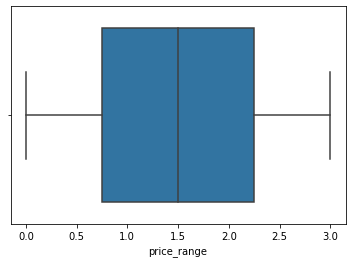

In [18]:
sns.boxplot(df['price_range'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


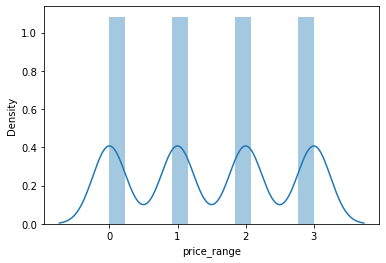

In [12]:
sns.distplot(df['price_range']);

### Univariant plot

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

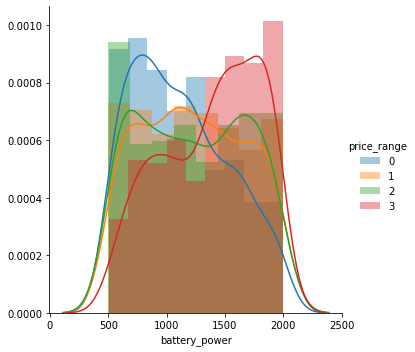

In [15]:
sns.FacetGrid(df,hue='price_range',size=5).map(sns.distplot,"battery_power").add_legend()

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a f

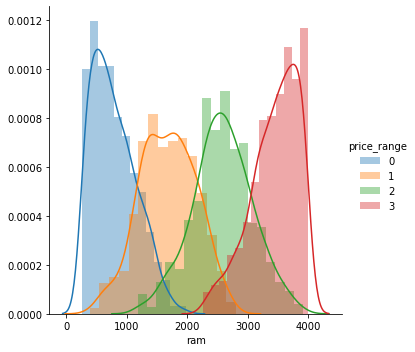

In [24]:
sns.FacetGrid(df,hue='price_range',size=5).map(sns.distplot,"ram").add_legend()

### Boxplot

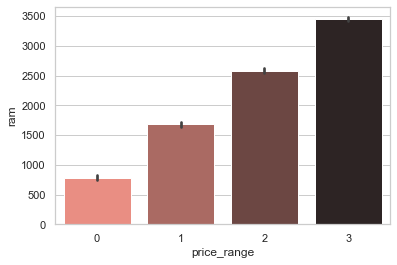

In [81]:
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="price_range", y="ram", data=df,palette="dark:salmon_r")

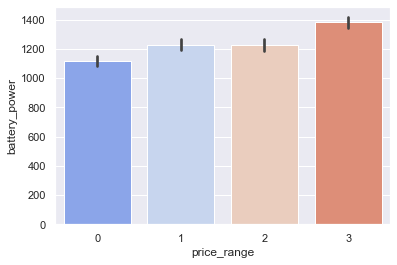

In [80]:
sns.set_style("darkgrid")
sns.set_context("notebook")

ax = sns.barplot(x="price_range", y="battery_power", data=df,palette="coolwarm")

### Hist plot

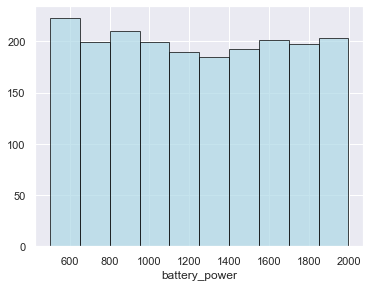

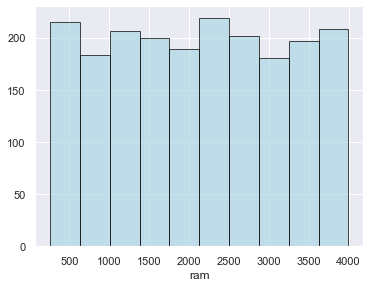

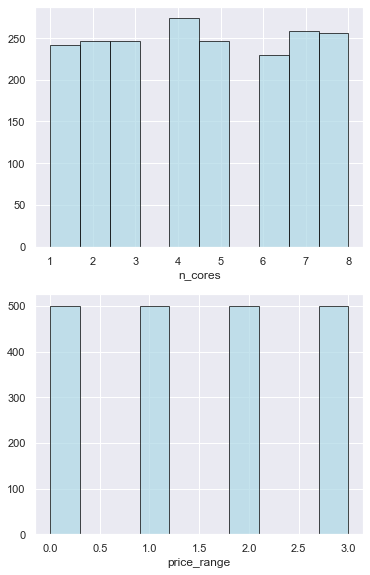

In [68]:

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.battery_power, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('battery_power')
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.ram, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('ram')
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.n_cores, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('n_cores')
plt.subplot(3,3,4)
plt.hist(df.price_range, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('price_range')

plt.show()

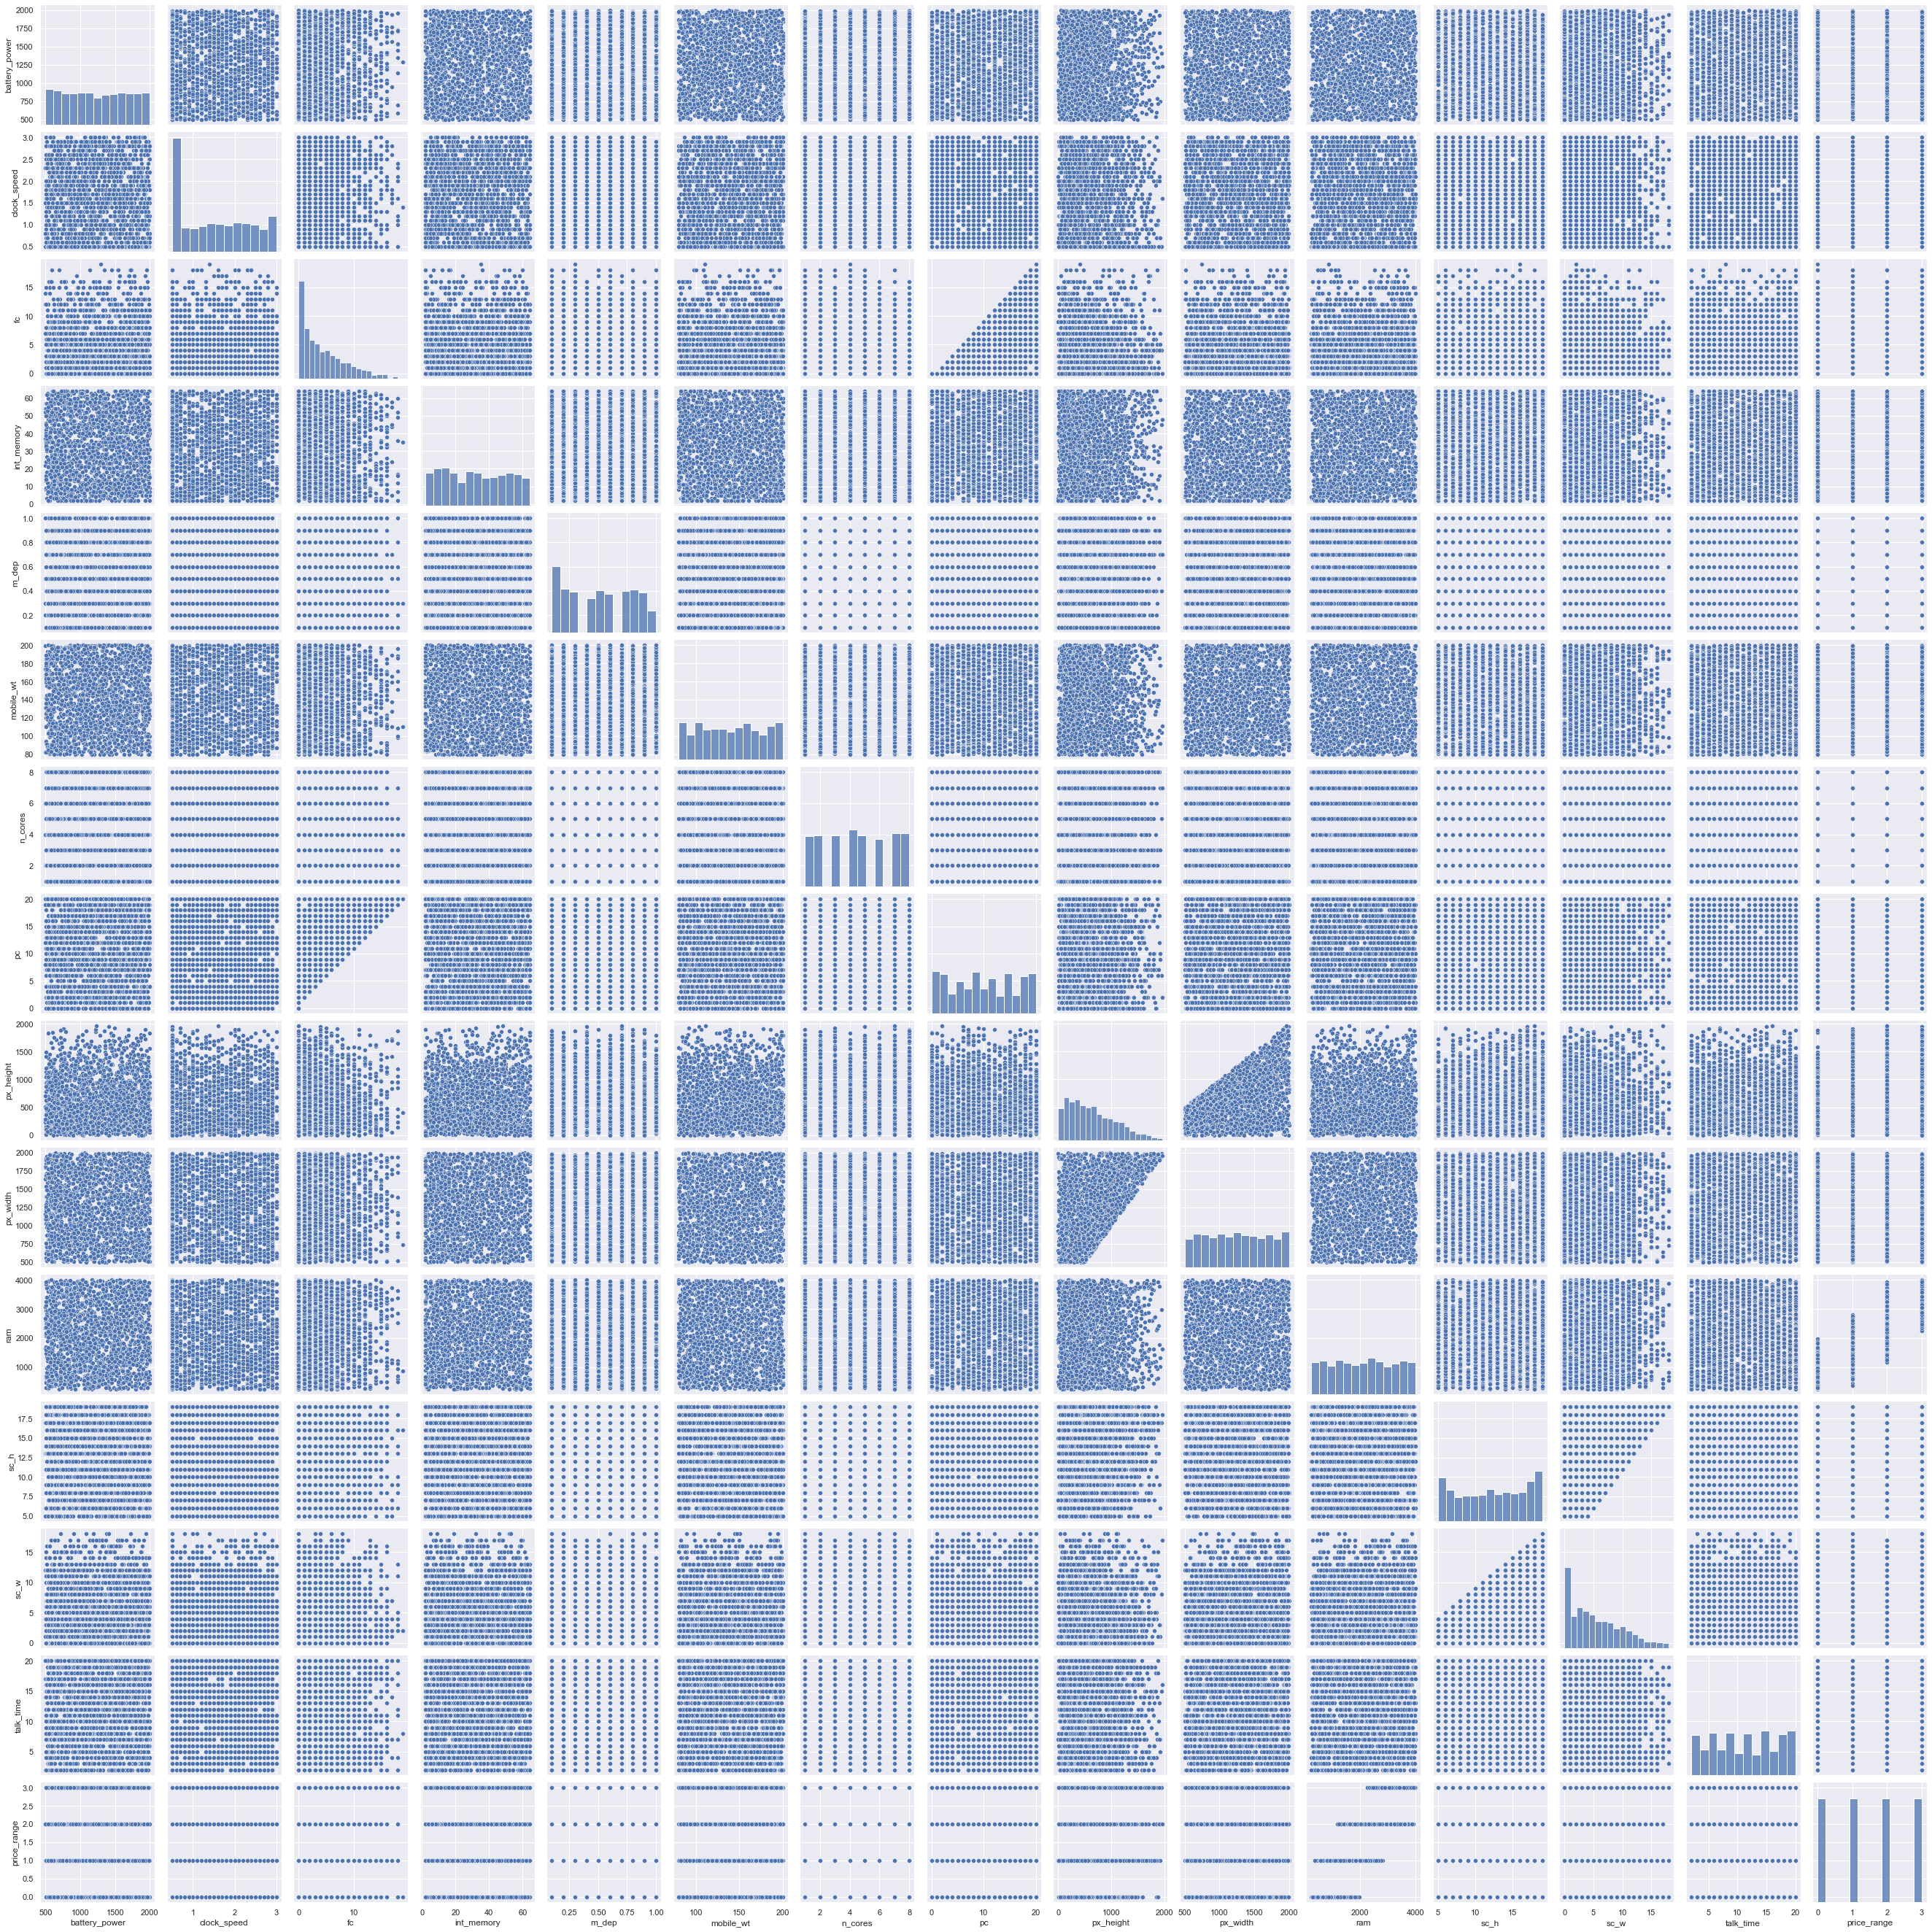

In [69]:
sns.pairplot(df)


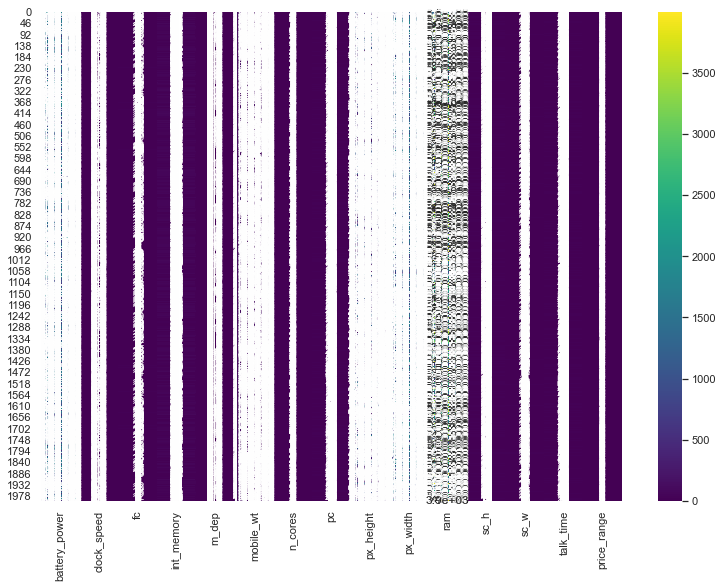

In [96]:
plt.figure(figsize=(13,9));
ax = sns.heatmap(df,annot=True, cmap="viridis")

In [34]:
df.corr()

battery_power  clock_speed        fc  int_memory     m_dep  \
battery_power       1.000000     0.011482  0.033334   -0.004004  0.034085   
clock_speed         0.011482     1.000000 -0.000434    0.006545 -0.014364   
fc                  0.033334    -0.000434  1.000000   -0.029133 -0.001791   
int_memory         -0.004004     0.006545 -0.029133    1.000000  0.006886   
m_dep               0.034085    -0.014364 -0.001791    0.006886  1.000000   
mobile_wt           0.001844     0.012350  0.023618   -0.034214  0.021756   
n_cores            -0.029727    -0.005724 -0.013356   -0.028310 -0.003504   
pc                  0.031441    -0.005245  0.644595   -0.033273  0.026282   
px_height           0.014901    -0.014523 -0.009990    0.010441  0.025263   
px_width           -0.008402    -0.009476 -0.005176   -0.008335  0.023566   
ram                -0.000653     0.003443  0.015099    0.032813 -0.009434   
sc_h               -0.029959    -0.029078 -0.011014    0.037771 -0.025348   
sc_w               -0.021421    -0.007378 -0.012373    0.011731 -0.018388   
talk_time           0.052510    -0.011432 -0.006829   -0.002790  0.017003   
price_range         0.200723    -0.006606  0.021998    0.044435  0.000853   

               mobile_wt   n_cores        pc  px_height  px_width       ram  \
battery_power   0.001844 -0.029727  0.031441   0.014901 -0.008402 -0.000653   
clock_speed     0.012350 -0.005724 -0.005245  -0.014523 -0.009476  0.003443   
fc              0.023618 -0.013356  0.644595  -0.009990 -0.005176  0.015099   
int_memory     -0.034214 -0.028310 -0.033273   0.010441 -0.008335  0.032813   
m_dep           0.021756 -0.003504  0.026282   0.025263  0.023566 -0.009434   
mobile_wt       1.000000 -0.018989  0.018844   0.000939  0.000090 -0.002581   
n_cores        -0.018989  1.000000 -0.001193  -0.006872  0.024480  0.004868   
pc              0.018844 -0.001193  1.000000  -0.018465  0.004196  0.028984   
px_height       0.000939 -0.006872 -0.018465   1.000000  0.510664 -0.020352   
px_width        0.000090  0.024480  0.004196   0.510664  1.000000  0.004105   
ram            -0.002581  0.004868  0.028984  -0.020352  0.004105  1.000000   
sc_h           -0.033855 -0.000315  0.004938   0.059615  0.021599  0.015996   
sc_w           -0.020761  0.025826 -0.023819   0.043038  0.034699  0.035576   
talk_time       0.006209  0.013148  0.014657  -0.010645  0.006720  0.010820   
price_range    -0.030302  0.004399  0.033599   0.148858  0.165818  0.917046   

                   sc_h      sc_w  talk_time  price_range  
battery_power -0.029959 -0.021421   0.052510     0.200723  
clock_speed   -0.029078 -0.007378  -0.011432    -0.006606  
fc            -0.011014 -0.012373  -0.006829     0.021998  
int_memory     0.037771  0.011731  -0.002790     0.044435  
m_dep         -0.025348 -0.018388   0.017003     0.000853  
mobile_wt     -0.033855 -0.020761   0.006209    -0.030302  
n_cores       -0.000315  0.025826   0.013148     0.004399  
pc             0.004938 -0.023819   0.014657     0.033599  
px_height      0.059615  0.043038  -0.010645     0.148858  
px_width       0.021599  0.034699   0.006720     0.165818  
ram            0.015996  0.035576   0.010820     0.917046  
sc_h           1.000000  0.506144  -0.017335     0.022986  
sc_w           0.506144  1.000000  -0.022821     0.038711  
talk_time     -0.017335 -0.022821   1.000000     0.021859  
price_range    0.022986  0.038711   0.021859     1.000000

### Bulid KNN model

In [6]:
x=df.drop(labels="price_range" , axis=1)
y=df["price_range"]
x.head()


battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  pc  \
0            842          2.2   1           7    0.6        188        2   2   
1           1021          0.5   0          53    0.7        136        3   6   
2            563          0.5   2          41    0.9        145        5   6   
3            615          2.5   0          10    0.8        131        6   9   
4           1821          1.2  13          44    0.6        141        2  14   

   px_height  px_width   ram  sc_h  sc_w  talk_time  
0         20       756  2549     9     7         19  
1        905      1988  2631    17     3          7  
2       1263      1716  2603    11     2          9  
3       1216      1786  2769    16     8         11  
4       1208      1212  1411     8     2         15

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=0)

### Cross validation

In [8]:
from sklearn.model_selection import cross_val_score
neighbors=list(range(1,40,2))
cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
#Neighbors are obtained using the canonical Euclidian distance. In the classification case predicted labels are obtained by majority vote.    

In [9]:
MSE=[1-x for x in cv_scores]
MSE

[0.09099999999999997,
 0.07499999999999996,
 0.0764999999999999,
 0.0734999999999999,
 0.07199999999999984,
 0.06649999999999989,
 0.06900000000000017,
 0.0684999999999999,
 0.0684999999999999,
 0.06799999999999995,
 0.06599999999999984,
 0.0684999999999999,
 0.07050000000000023,
 0.06899999999999995,
 0.06899999999999995,
 0.0695,
 0.07049999999999979,
 0.07050000000000001,
 0.07300000000000006,
 0.07099999999999995]

In [10]:
optimal_k=neighbors[MSE.index(min(MSE))]
optimal_k

21

In [11]:
NNH = KNeighborsClassifier(n_neighbors= 21 ,metric='euclidean' )

In [12]:
NNH.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=21)

### Evaluate Performance of kNN Model

In [13]:
predicted_labels=NNH.predict(x_test)
NNH.score(x_test,y_test)

0.96

In [14]:
from sklearn.metrics import confusion_matrix

Confusion Matrix


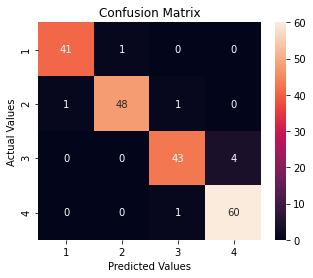

In [15]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels)
cm_df = pd.DataFrame(cm,
                     index = ["1","2","3","4"], 
                     columns = ["1","2","3","4"])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
